<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/HW_Forecast_temp_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 1 (Temperature forecast model)
In this activity, your task is to build a good predictive model for temperatures so that it can add value to the current project.

Given the guidelines, let's proceed with our activity:

Create a visualization of the time series related to temperatures (TEMP column).

Identify the seasonality present in the data.

Perform a forecast of temperature values for one year after the end of the time series.

Analyze the trend, annual seasonality, and weekly seasonality components of the temperature series.

## Imports


In [2]:
import pandas as pd
import plotly.express as px
import calendar
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

## First model

In [3]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Alura/Data-science_Regressão:prevendo-séries-temporais-com-Prophe/poluentes.csv')
df

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0
...,...,...,...,...,...,...,...,...
1455,2024-02-24,22.0,33.0,17.0,59.0,575.0,51.0,5.0
1456,2024-02-25,11.0,20.0,7.0,43.0,421.0,66.0,7.0
1457,2024-02-26,28.0,41.0,10.0,65.0,721.0,49.0,7.0
1458,2024-02-27,75.0,97.0,21.0,98.0,1427.0,37.0,8.0


In [4]:
df.dtypes

,0
Data,object
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64


In [5]:
# convert Data to datetime
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

,0
Data,datetime64[ns]
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64


### Create a visualization of the time series related to temperatures (TEMP column).

In [6]:
# Vizualize temperature day by day
fig = px.line(df, x='Data', y='TEMP', title='Temperature')
fig.show()

### Identify the seasonality present in the data.


In [7]:
# Check seasonality
df_2022 =df[df['Data'].dt.year == 2022]
df_2022_mensal = df_2022.groupby(df_2022['Data'].dt.month)['TEMP'].mean().reset_index()

df_2022_mensal['month'] = df_2022_mensal['Data'].apply(lambda x: calendar.month_abbr[x])
df_2022_mensal

,Data,TEMP,month
0,1,-0.741935,Jan
1,2,1.285714,Feb
2,3,8.419355,Mar
3,4,15.566667,Apr
4,5,21.451613,May
5,6,24.466667,Jun
6,7,26.387097,Jul
7,8,26.516129,Aug
8,9,20.566667,Sep
9,10,14.387097,Oct


In [8]:
# chart
fig = px.bar(df_2022_mensal, x='month', y='TEMP', title='Temperature for month in 2022')
fig.show()

### Perform a forecast of temperature values for one year after the end of the time series.


In [9]:
df_prophet = df[['Data', 'TEMP']]
df_prophet.columns = ['ds', 'y']
df_prophet

,ds,y
0,2020-03-01,1.0
1,2020-03-02,1.0
2,2020-03-03,6.0
3,2020-03-04,10.0
4,2020-03-05,6.0
...,...,...
1455,2024-02-24,5.0
1456,2024-02-25,7.0
1457,2024-02-26,7.0
1458,2024-02-27,8.0


In [10]:
np.random.seed(4587)

model = Prophet()
model.fit(df_prophet)

forecast = model.make_future_dataframe(periods = 365, freq = 'D')
forecast = model.predict(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/auc05zxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/_ap2vsbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93694', 'data', 'file=/tmp/tmpky5ozwno/auc05zxk.json', 'init=/tmp/tmpky5ozwno/_ap2vsbd.json', 'output', 'file=/tmp/tmpky5ozwno/prophet_modeltkppsp76/prophet_model-20250303175637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
fig = plot_plotly(model, forecast)
fig.show()

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,11.413120,-1.862400,4.574915,11.413120,11.413120,-10.066279,-10.066279,-10.066279,0.027936,0.027936,0.027936,-10.094216,-10.094216,-10.094216,0.0,0.0,0.0,1.346841
1,2020-03-02,11.422210,-1.306377,5.045779,11.422210,11.422210,-9.623640,-9.623640,-9.623640,0.168891,0.168891,0.168891,-9.792531,-9.792531,-9.792531,0.0,0.0,0.0,1.798570
2,2020-03-03,11.431299,-1.534489,5.126681,11.431299,11.431299,-9.464928,-9.464928,-9.464928,0.003592,0.003592,0.003592,-9.468521,-9.468521,-9.468521,0.0,0.0,0.0,1.966371
3,2020-03-04,11.440389,-1.029228,5.424882,11.440389,11.440389,-9.223112,-9.223112,-9.223112,-0.099522,-0.099522,-0.099522,-9.123590,-9.123590,-9.123590,0.0,0.0,0.0,2.217277
4,2020-03-05,11.449479,-0.541874,5.751977,11.449479,11.449479,-8.875240,-8.875240,-8.875240,-0.115635,-0.115635,-0.115635,-8.759605,-8.759605,-8.759605,0.0,0.0,0.0,2.574238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2025-02-23,15.744871,1.046882,7.415754,15.238295,16.193959,-11.431249,-11.431249,-11.431249,0.027936,0.027936,0.027936,-11.459186,-11.459186,-11.459186,0.0,0.0,0.0,4.313622
1821,2025-02-24,15.747846,1.345715,7.729601,15.239512,16.199831,-11.128474,-11.128474,-11.128474,0.168891,0.168891,0.168891,-11.297365,-11.297365,-11.297365,0.0,0.0,0.0,4.619372
1822,2025-02-25,15.750821,1.566337,7.869847,15.240729,16.205671,-11.112277,-11.112277,-11.112277,0.003592,0.003592,0.003592,-11.115869,-11.115869,-11.115869,0.0,0.0,0.0,4.638544
1823,2025-02-26,15.753796,1.502176,7.902769,15.241947,16.210209,-11.012517,-11.012517,-11.012517,-0.099522,-0.099522,-0.099522,-10.912995,-10.912995,-10.912995,0.0,0.0,0.0,4.741279


In [13]:
forecast_filtered = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast_filtered

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-01,1.346841,-1.862400,4.574915
1,2020-03-02,1.798570,-1.306377,5.045779
2,2020-03-03,1.966371,-1.534489,5.126681
3,2020-03-04,2.217277,-1.029228,5.424882
4,2020-03-05,2.574238,-0.541874,5.751977
...,...,...,...,...
1820,2025-02-23,4.313622,1.046882,7.415754
1821,2025-02-24,4.619372,1.345715,7.729601
1822,2025-02-25,4.638544,1.566337,7.869847
1823,2025-02-26,4.741279,1.502176,7.902769


### Analyze the trend, annual seasonality, and weekly seasonality components of the temperature series.

In [14]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



##### How prophet components works

y(t) = g(t) + s(t) + h(t) + ϵt

y(t): real value/observed value

g(t): tendency component

s(t): sazonality tendenci

h(t): component holliday

ϵt: error

## Second model
In the previous activity, we collected temperature-related data, visualized it, trained the model with the entire dataset, and observed its output. However, the ideal approach is to evaluate the model's performance to ensure it delivers good results for periods the model has not yet seen.

To achieve this, we need to revisit our steps and adjust our project. Given this context, here is the objective of this activity:

Split the dataset into training and testing sets.

Train the model using the training data.

Generate predictions for the same time window as the test data.

Compare the model's predictions with the expected test values and evaluate the results.

In [15]:
len(df_prophet)

1460

In [16]:
leght_train = int(len(df_prophet) * 0.8)
leght_test = int(len(df_prophet) * 0.2)

print(leght_train, leght_test)

1168 292


### Train the model using the training data.


In [17]:
# Train Dataframe

df_train = pd.DataFrame()
df_train['ds'] = df_prophet['ds'][:1168]
df_train['y'] = df_prophet['y'][:1168]

# Test Dataframe

df_test = pd.DataFrame()
df_test['ds'] = df_prophet['ds'][1168:]
df_test['y'] = df_prophet['y'][1168:]

In [18]:
# Build a model
np.random.seed(4587)

model = Prophet()
model.fit(df_train)

future = model.make_future_dataframe(periods = 292, freq = 'D' )
forecast =  model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/hxj7d652.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/asap7hm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18747', 'data', 'file=/tmp/tmpky5ozwno/hxj7d652.json', 'init=/tmp/tmpky5ozwno/asap7hm0.json', 'output', 'file=/tmp/tmpky5ozwno/prophet_modelwligjr1l/prophet_model-20250303175638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Generate predictions for the same time window as the test data.


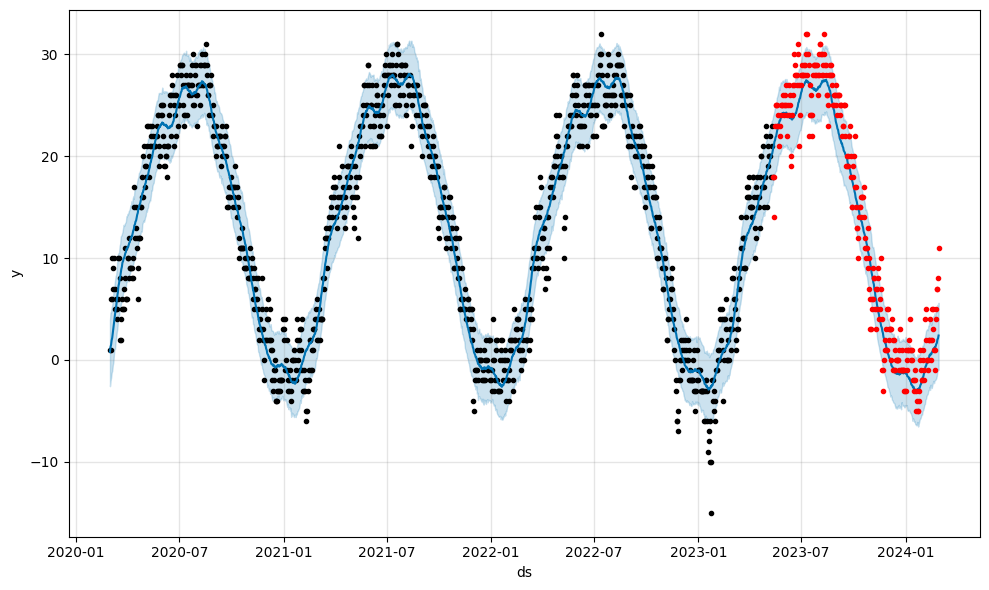

In [19]:
fig1 = model.plot(forecast)

plt.plot(df_test['ds'], df_test['y'], '.r')
plt.show()

### Compare the model's predictions with the expected test values and evaluate the results.

In [20]:
df_forecast = forecast[['ds', 'yhat']]
df_comparison = pd.merge(df_forecast, df_test, on = 'ds', how = 'inner')
df_comparison

,ds,yhat,y
0,2023-05-13,20.830368,18.0
1,2023-05-14,21.017753,14.0
2,2023-05-15,21.428685,18.0
3,2023-05-16,21.549249,23.0
4,2023-05-17,21.862693,25.0
...,...,...,...
287,2024-02-24,1.568746,5.0
288,2024-02-25,1.675575,7.0
289,2024-02-26,2.023777,7.0
290,2024-02-27,2.102684,8.0


In [21]:
mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse).round(2)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 7.222110340298309, RMSE: 2.69


## Third model
Perform outlier treatment on the temperature data.

Define optimal hyperparameters for the Prophet model.

Obtain a well-fitted model by the end of the training.

### Perform outlier treatment on the temperature data.


In [22]:
np.random.seed(4587)

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods = 0, freq = 'D') # we gtt the security interval
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/n2lshc02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/damvo7g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45036', 'data', 'file=/tmp/tmpky5ozwno/n2lshc02.json', 'init=/tmp/tmpky5ozwno/damvo7g7.json', 'output', 'file=/tmp/tmpky5ozwno/prophet_modelmo40dg5n/prophet_model-20250303175639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
without_outliers = df_prophet[(df_prophet ['y'] > forecast['yhat_lower']) & (df_prophet ['y'] < forecast['yhat_upper'])]
without_outliers.reset_index( drop = True, inplace = True)

In [24]:
leght_train = int(len(without_outliers) * 0.8)
leght_test = int(len(without_outliers) * 0.2)

print(leght_train, leght_test)

946 236


In [25]:
# Train Dataframe

df_train_without_outliers = pd.DataFrame()
df_train_without_outliers['ds'] = without_outliers['ds'][:946]
df_train_without_outliers['y'] = without_outliers['y'][:946]

# Test Dataframe

df_test_without_outliers = pd.DataFrame()
df_test_without_outliers['ds'] = without_outliers['ds'][946:]
df_test_without_outliers ['y'] = without_outliers['y'][946:]

### Define optimal hyperparameters for the Prophet model.


In [26]:
np.random.seed(4587)

model_final = Prophet(changepoint_prior_scale = 0.5,
                      yearly_seasonality= 20)
model_final.fit(df_train_without_outliers)

future = model_final.make_future_dataframe(periods = 365, freq = 'D' )
forecast =  model_final.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/jggh2ors.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/_sjawe7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5181', 'data', 'file=/tmp/tmpky5ozwno/jggh2ors.json', 'init=/tmp/tmpky5ozwno/_sjawe7a.json', 'output', 'file=/tmp/tmpky5ozwno/prophet_modelkq8lpnza/prophet_model-20250303175640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


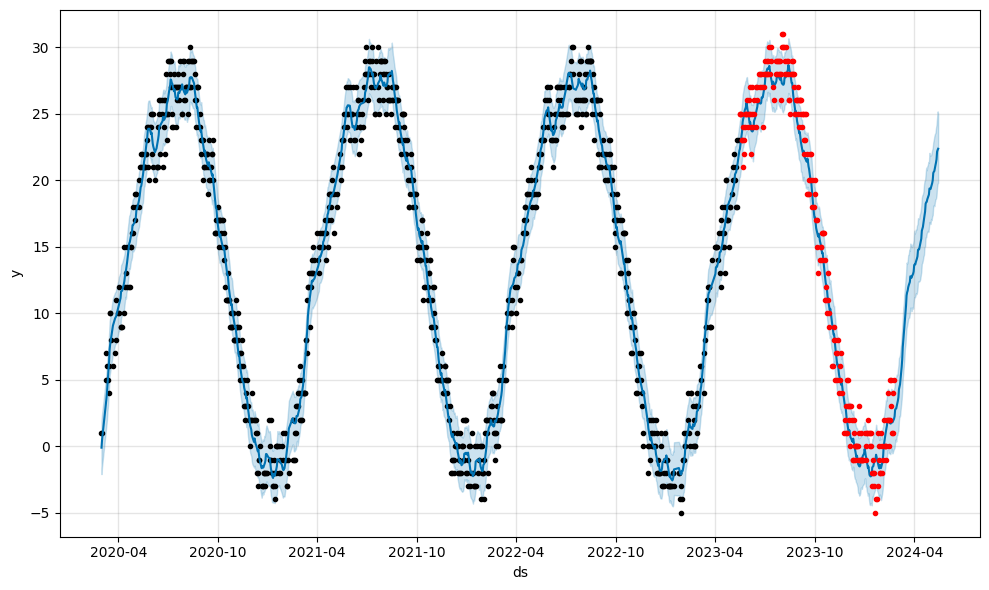

In [27]:
fig1= model_final.plot(forecast)

plt.plot(df_test_without_outliers['ds'], df_test_without_outliers['y'], '.r')
plt.show()

In [28]:
df_forecast = forecast[['ds', 'yhat']]
df_comparison = pd.merge(df_forecast, df_test_without_outliers, on = 'ds', how = 'inner')
df_comparison

,ds,yhat,y
0,2023-05-17,22.342188,25.0
1,2023-05-18,22.666500,25.0
2,2023-05-19,22.966817,25.0
3,2023-05-20,23.287228,23.0
4,2023-05-21,23.670750,23.0
...,...,...,...
232,2024-02-19,2.027473,5.0
233,2024-02-20,1.917377,1.0
234,2024-02-22,1.884007,1.0
235,2024-02-23,1.960532,4.0


In [29]:
mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse).round(2)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 3.0069843496434236, RMSE: 1.73


##cross validation

In [38]:
df_cv = cross_validation(model_final, initial = '365.25 days', period = '45 days', horizon = '90 days')
df_cv

INFO:prophet:Making 16 forecasts with cutoffs between 2021-04-11 00:00:00 and 2023-02-15 00:00:00


  0%|          | 0/16 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/3e6lp7zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/li1i2sw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88281', 'data', 'file=/tmp/tmpky5ozwno/3e6lp7zx.json', 'init=/tmp/tmpky5ozwno/li1i2sw3.json', 'output', 'file=/tmp/tmpky5ozwno/prophet_model__ce1ldl/prophet_model-20250303180107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/6se6gz33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5ozwno/hmz01qjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-12,16.849852,15.089564,18.530106,15.0,2021-04-11
1,2021-04-13,16.736661,15.138671,18.497501,16.0,2021-04-11
2,2021-04-15,17.458289,15.750109,19.184366,17.0,2021-04-11
3,2021-04-16,17.489332,15.839163,19.280262,16.0,2021-04-11
4,2021-04-17,17.906268,16.073914,19.705149,14.0,2021-04-11
...,...,...,...,...,...,...
1173,2023-05-09,20.052193,18.079995,22.075301,18.0,2023-02-15
1174,2023-05-10,20.121329,18.076690,22.073447,21.0,2023-02-15
1175,2023-05-11,20.313886,18.286694,22.301106,23.0,2023-02-15
1176,2023-05-12,20.525572,18.428399,22.321268,18.0,2023-02-15


In [39]:
df_cv['cutoff'].unique()

<DatetimeArray>
['2021-04-11 00:00:00', '2021-05-26 00:00:00', '2021-07-10 00:00:00',
 '2021-08-24 00:00:00', '2021-10-08 00:00:00', '2021-11-22 00:00:00',
 '2022-01-06 00:00:00', '2022-02-20 00:00:00', '2022-04-06 00:00:00',
 '2022-05-21 00:00:00', '2022-07-05 00:00:00', '2022-08-19 00:00:00',
 '2022-10-03 00:00:00', '2022-11-17 00:00:00', '2023-01-01 00:00:00',
 '2023-02-15 00:00:00']
Length: 16, dtype: datetime64[ns]

In [40]:
df_performance = performance_metrics(df_cv)
df_performance

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,10 days,3.717133,1.927987,1.612154,0.103059,0.377853,0.640456
1,11 days,4.306013,2.075093,1.734056,0.121866,0.395648,0.601140
2,12 days,4.535661,2.129709,1.786449,0.115959,0.410925,0.579643
3,13 days,4.917112,2.217456,1.876633,0.146768,0.418129,0.554241
4,14 days,5.223192,2.285430,1.941304,0.148797,0.434150,0.535174
...,...,...,...,...,...,...,...
76,86 days,9.701689,3.114753,2.403393,0.153959,0.515792,0.461538
77,87 days,9.973008,3.158007,2.408812,0.157514,0.535573,0.474359
78,88 days,10.576538,3.252159,2.505017,0.161331,0.564537,0.435240
79,89 days,11.446983,3.383339,2.584398,0.168551,0.559094,0.432845


In [41]:
df_performance['rmse'].mean().round(2)

2.63

In [42]:
df_performance['mae'].mean().round(2)

2.05

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



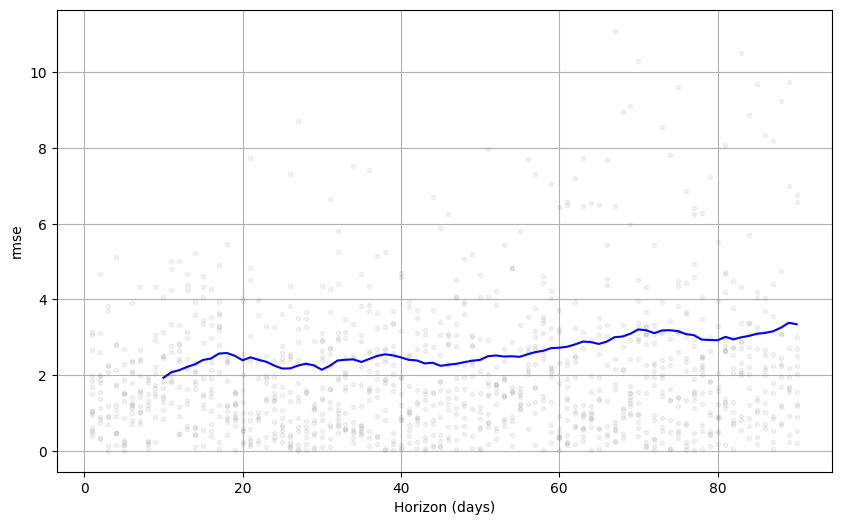

In [44]:
plot_cross_validation_metric(df_cv, metric = 'rmse');

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



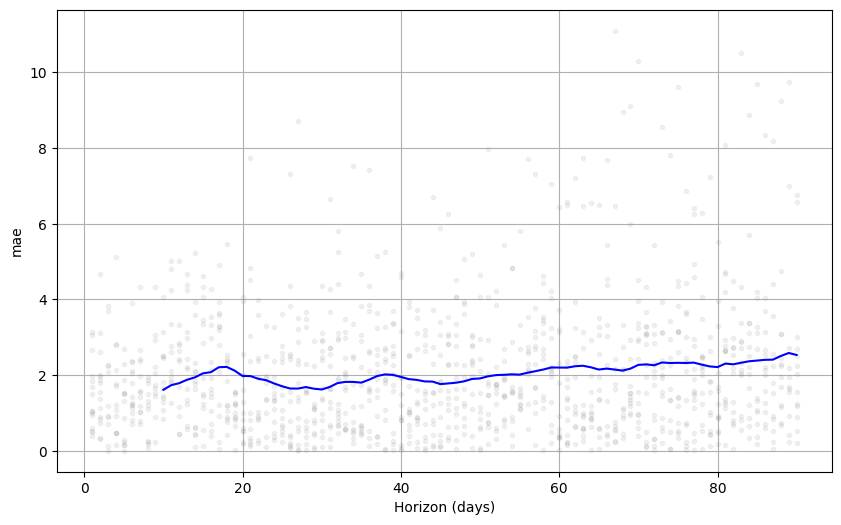

In [45]:
plot_cross_validation_metric(df_cv, metric = 'mae');